 # 1.Precios de Spy y JP Morgan

In [ ]:
# @title
!pip install yfinance
!pip  install seaborn

In [18]:
import pandas as pd
import yfinance as yf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go

In [7]:
tickers = ['SPY','JPM']
data = pd.DataFrame()
for t in tickers:
     data[t]=tickers_data=yf.download(t, start="1993-01-29", progress=False)['Adj Close']

display(data)

,SPY,JPM
Date,,
1993-01-29,25.029367,5.512947
1993-02-01,25.207382,5.563838
1993-02-02,25.260786,5.580798
1993-02-03,25.527824,5.648652
1993-02-04,25.634638,5.716504
...,...,...
2023-08-30,451.010010,148.160004
2023-08-31,450.350006,146.330002
2023-09-01,451.190002,146.820007


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7706 entries, 1993-01-29 to 2023-09-06
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SPY     7706 non-null   float64
 1   JPM     7706 non-null   float64
dtypes: float64(2)
memory usage: 180.6 KB


# 2.Graficas de precios de cierre de los activos financieros y Pruebas de Estacionariedad

##  ¿Se observa alguna conexión entre sus tendencias? ¿Cree que los precios son estacionarios?

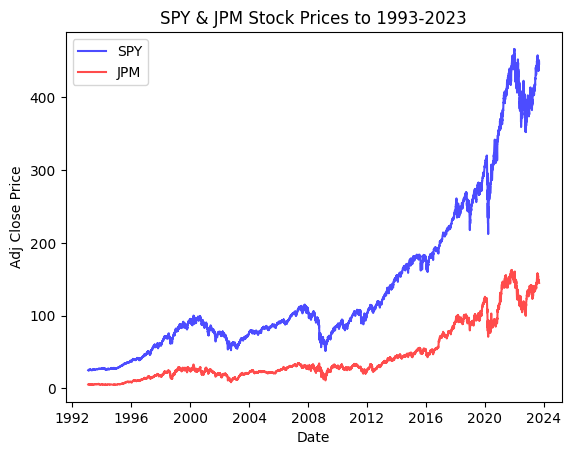

In [32]:
fig, ax = plt.subplots()
ax.plot(data['SPY'].index,data.SPY,label="SPY",color="blue",alpha=0.7)
ax.plot(data.index,data.JPM,label="JPM",color="red",alpha=0.7)
plt.title("SPY & JPM Stock Prices to 1993-2023")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Adj Close Price")
plt.show()

Esto se puede determinar visualmente a partir de la gráfica. Si las líneas tienden a moverse de manera similar (por ejemplo, si ambos activos suben o bajan juntos), hay una conexión en las tendencias.

 Esta es una cuestión más compleja y requiere un análisis estadístico. No se puede determinar visualmente desde una gráfica. Se necesitaría realizar pruebas específicas de estacionariedad de series temporales.


In [38]:
from statsmodels.tsa.stattools import adfuller
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    print('Estadística ADF:', result[0])
    print('Valor p:', result[1])
    print('Valores críticos:', result[4])
    print('Número de retrasos utilizados:', result[2])

print('Resultados de la prueba ADF para SPY:')
adf_test(data['SPY'])

print('\nResultados de la prueba ADF para JPM:')
adf_test(data['JPM'])

Resultados de la prueba ADF para SPY:
Estadística ADF: 1.9685887672315274
Valor p: 0.9986307187066228
Valores críticos: {'1%': -3.4312029782452327, '5%': -2.8619169530282487, '10%': -2.5669706475785405}
Número de retrasos utilizados: 36

Resultados de la prueba ADF para JPM:
Estadística ADF: 0.2978192142780196
Valor p: 0.9772442117533295
Valores críticos: {'1%': -3.431202644591467, '5%': -2.8619168055992206, '10%': -2.5669705691001825}
Número de retrasos utilizados: 33


La prueba ADF devuelve una estadística ADF y un valor p. Un valor p bajo (generalmente menor que 0.05) indica que la serie es estacionaria. Si los precios de cualquiera de los activos no son estacionarios, es posible que desees aplicar transformaciones (como diferenciación) para hacer que la serie sea estacionaria antes de realizar análisis de series temporales más avanzados.

# 3.Calculo de Retornos y Varianza de cada activo

In [51]:
##Calculo de Retornos de cada activo
log_returns = np.log(1 + data.pct_change())
cov=log_returns.cov()*252
cor=log_returns.corr()

In [16]:
display(log_returns)

,SPY,JPM
Date,,
1993-01-29,NaN,NaN
1993-02-01,0.007087,0.009189
1993-02-02,0.002116,0.003043
1993-02-03,0.010516,0.012085
1993-02-04,0.004175,0.011940
...,...,...
2023-08-30,0.004110,-0.004041
2023-08-31,-0.001464,-0.012428
2023-09-01,0.001863,0.003343


## Calculo de media,varianza de los retornos de cada activos

In [62]:
def medidas(data):
    data=pd.DataFrame({'Media': round(log_returns.mean()*252,2),"Varianza":round(log_returns.var()*252,2)})

    return data

In [66]:
medidas(log_returns)

,Media,Varianza
SPY,0.09,0.04
JPM,0.11,0.13


# 4. Matriz de Varianza y Correlacion

In [57]:
log_returns.corr()

,SPY,JPM
SPY,1.000000,0.707482
JPM,0.707482,1.000000


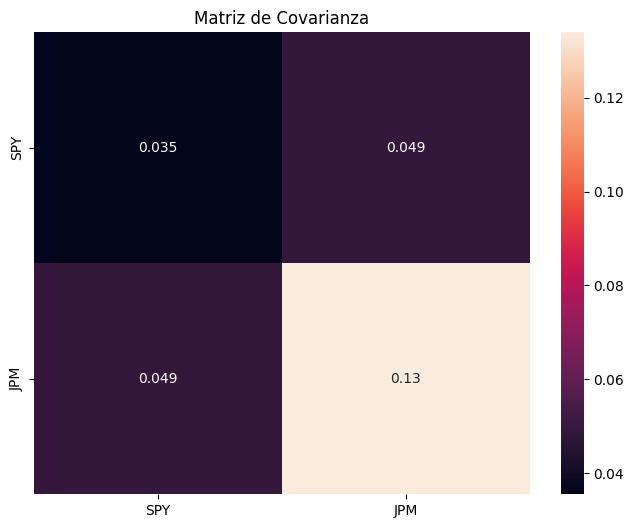

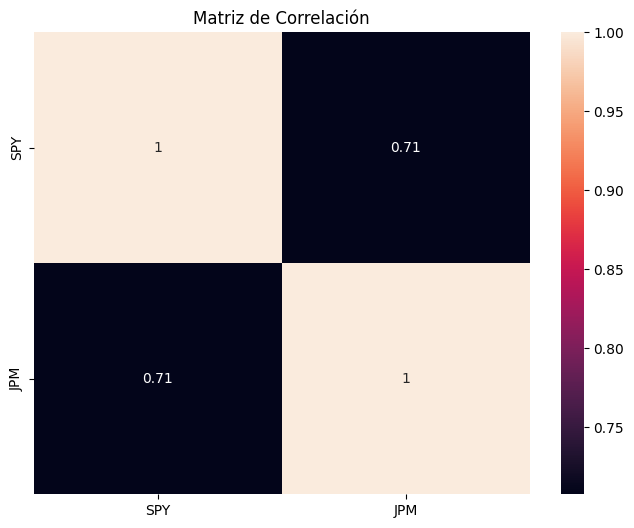

In [71]:
plt.figure(figsize=(8, 6))
sns.heatmap(cov, linecolor="white", robust=False, fmt=".2g", annot=True)
plt.title('Matriz de Covarianza')
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(cor, linecolor="black", robust=False, annot=True)
plt.title('Matriz de Correlación')
plt.show()

# 5 Graficas de Retornos y prueba de estacionariedad

In [70]:
log_returns = np.log(1 + data.pct_change())
cov=log_returns.cov()*252
trace1 = go.Scatter(x=log_returns.index, y=log_returns.values[:,0], mode='lines', name='SPY')
trace2 = go.Scatter(x=log_returns.index, y=log_returns.values[:,1], mode='lines', name='JPM')
trace3 = go.Scatter(x=log_returns.index, y=log_returns['SPY'], mode='markers', name='SPY Points', marker=dict(size=4))
trace4 = go.Scatter(x=log_returns.index, y=log_returns['JPM'], mode='markers', name='JPM Points', marker=dict(size=4))
fig = go.Figure(data=[trace1, trace2, trace3, trace4])
fig.update_layout(title='Return Time Series to SPY & JPM')
fig.show()
plt.show()

Se evidencia que se observa que si hay diferencias significativas en las tendencias o en la volatilidad de estos dos activos financieros.No obstante,la disparidad significativa podría manifestarse en diferencias notables en la magnitud o la dirección de los retornos a lo largo del tiempo.

In [68]:
# Realizar la prueba ADF en los retornos de SPY
result_spy = adfuller(log_returns['SPY'].dropna())
print("Prueba ADF para SPY:")
print("Estadística ADF:", result_spy[0])
print("Valor p:", result_spy[1])
print("Valores críticos:", result_spy[4])

# Realizar la prueba ADF en los retornos de JPM
result_jpm = adfuller(log_returns['JPM'].dropna())
print("\nPrueba ADF para JPM:")
print("Estadística ADF:", result_jpm[0])
print("Valor p:", result_jpm[1])
print("Valores críticos:", result_jpm[4])

Prueba ADF para SPY:
Estadística ADF: -16.334214874884207
Valor p: 3.0399271566085905e-29
Valores críticos: {'1%': -3.431202755780382, '5%': -2.8619168547294147, '10%': -2.5669705952528132}

Prueba ADF para JPM:
Estadística ADF: -15.6986079653627
Valor p: 1.4050948692748114e-28
Valores críticos: {'1%': -3.4312029782452327, '5%': -2.8619169530282487, '10%': -2.5669706475785405}


La Prueba ADF evalúa si una serie temporal tiene raíces unitarias (no estacionaria) o no. Un valor p bajo (generalmente menor que 0.05) indica que la serie es estacionaria.Se concluye que no estacionarias